# From free fermions to limit shapes and beyond
Anton Nazarov (Saint Petersburg State University)

## Lecture 1

### Teaser pictures

Some imports first:

In [233]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

**Young diagram** or **partition** - ordered set of integers $\lambda=(\lambda_1,\lambda_2,\dots,\lambda_n)$ and $\lambda_i\geq \lambda_{i+1}$.

See an illustration below. We use so called "French" notation here.

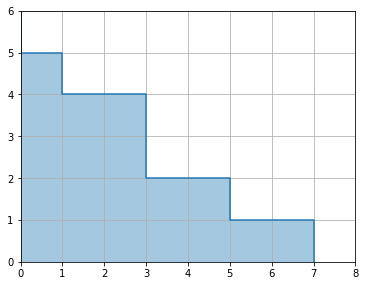

In [234]:
# create a figure and axes
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,1,1)   
ax1.set_xlim(( 0, 8))            
ax1.set_ylim((0, 6))

ax1.set_aspect('equal','box')
plt.grid()
rows=[7,5,3,3,1,0]
diagdata=([x for x in rows for _ in range(2)]+[0],
          [0]+[y for y in range(1,len(rows)+1) for _ in range(2)])
plt.plot(*diagdata)
plt.fill_between(*diagdata,alpha=0.4)
plt.show()                     

#### Inverse hook walk
Let's generate a random Young diagram by the inverse hook walk algorithm. We start with an empty Young diagram.
1. We create a box at random position $(i,j)$ outside of the diagram.
2. Draw a hook from it and choose next position of the box uniformly from the hook. We proceed to move the box this way until new position is adjacent to the diagram. 
3. We then add the box to the diagram and go to step 1.

We add $n$ boxes to sample a random diagram from the Plancherel measure 
$$\mu_n (\lambda)= \frac{\dim(\lambda)^2}{n!}.$$
Here $\dim(\lambda)$ is the dimension of the symmetric group $S_n$ representation, that corresponds to the diagram $\lambda$. We will discuss it on next lectures. 

#### Animation of the algorithm
Prepare the figure

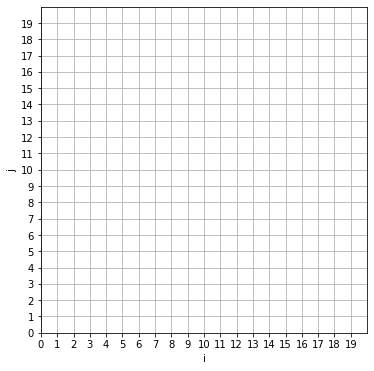

In [235]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n=20 # size of the area
# create a figure and axes
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,1,1)   

# set up the subplots as needed
ax1.set_xlim(( 0, n))            
ax1.set_ylim((0, n))
ax1.set_xlabel('i')
ax1.set_ylabel('j')
ax1.set_title('Young diagram')
ax1.set_aspect('equal','box')
ax1.set_xticks(np.arange(0, n, 1))
ax1.set_yticks(np.arange(0, n, 1))
plt.grid()
# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
box1, = ax1.plot([], [], 'r', lw=2)     # ax.plot returns a list of 2D line objects
hook1, = ax1.plot([], [], 'y', lw=2)
diagram, = ax1.plot([], [], 'b', lw=2)


from numpy.random import default_rng
rng = default_rng()

ncolumns=0
nrows=0
rows=np.zeros(n,dtype=int)
columns=np.zeros(n,dtype=int)
i=ncolumns+rng.integers(n-ncolumns)
j=nrows+rng.integers(n-nrows)
hooklength=i-rows[j]+j-columns[i]+1

Animation step

In [236]:
# animation function. This is called sequentially
def drawframe(framenumber):
    global hooklength, i,j, nrows, ncolumns,rows, columns,n
    #print(i,j,rows,columns)
    if hooklength>1:
        k=rng.integers(hooklength)
        if k<i+1-rows[j]:
            i=rows[j]+k
        else:
            j=j-k+i-rows[j]
        hooklength=i-rows[j]+j-columns[i]+1
    else:
        rows[j]+=1
        columns[i]+=1
        if i>ncolumns:
            ncolumns=i
        if j>nrows:
            nrows=j
        i=ncolumns+rng.integers(n-ncolumns)
        j=nrows+rng.integers(n-nrows)
        hooklength=i-rows[j]+j-columns[i]+1

    box1.set_data([i,i+1,i+1,i,i],[j,j,j+1,j+1,j])
    hook1.set_data([rows[j],i,i,i+1,i+1,rows[j],rows[j]],
                   [j,j,columns[i],columns[i],j+1,j+1,j])
    diagdata=([0]+[x for x in range(1,n+1) for _ in range(2)],
                     [y for y in columns for _ in range(2)]+[0])
        
    diagram.set_data(*diagdata)
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (box1,hook1,diagram)


Animate and convert to HTML video

In [237]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=200, interval=400, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

#### Sampling of large diagram and limit shape
Use the algorithm to sample a large diagram of $n$ boxes and draw it.
First, introduce the function to sample a diagram.

In [238]:
def sample_diagram(n):
    ncolumns=0
    nrows=0
    rows=np.zeros(n,dtype=int)
    columns=np.zeros(n,dtype=int)
    for _ in range(n):
        i=ncolumns+rng.integers(n-ncolumns)
        j=nrows+rng.integers(n-nrows)
        hooklength=i-rows[j]+j-columns[i]+1
        while hooklength>1:
            k=rng.integers(hooklength)
            if k<i+1-rows[j]:
                i=rows[j]+k
            else:
                j=j-k+i-rows[j]
            hooklength=i-rows[j]+j-columns[i]+1
        rows[j]+=1
        columns[i]+=1
        if i>ncolumns:
            ncolumns=i
        if j>nrows:
            nrows=j
        i=ncolumns+rng.integers(n-ncolumns)
        j=nrows+rng.integers(n-nrows)
        hooklength=i-rows[j]+j-columns[i]+1
    return rows[:nrows+1]


Let's sample and draw a diagram of 1600 boxes.

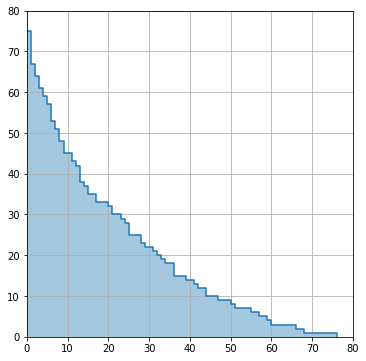

In [239]:
rows=sample_diagram(1600)

# create a figure and axes
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,1,1)   
ax1.set_xlim(( 0, 80))            
ax1.set_ylim((0, 80))

ax1.set_aspect('equal','box')
plt.grid()
diagdata=([x for x in rows for _ in range(2)]+[0],
[0]+[y for y in range(1,len(rows)+1) for _ in range(2)])
plt.plot(*diagdata)
plt.fill_between(*diagdata,alpha=0.4)
plt.show()                     

We see that diagram approximates a smooth curve, as we see for larger diagram of 16384 boxes

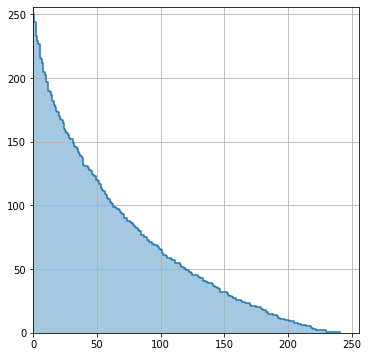

In [240]:
rows=sample_diagram(16384)

# create a figure and axes
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,1,1)   
ax1.set_xlim(( 0, 256))            
ax1.set_ylim((0, 256))

ax1.set_aspect('equal','box')
plt.grid()
diagdata=([x for x in rows for _ in range(2)]+[0],
[0]+[y for y in range(1,len(rows)+1) for _ in range(2)])
plt.plot(*diagdata)
plt.fill_between(*diagdata,alpha=0.4)
plt.show()          

The diagram not a particularly nice function, it is piecewise-constant. It is often more convenient to rotate it $45^{\circ}$ counterclockwise and scale by a factor of $\sqrt{n}$.
Then the diagram boundary becomes a piecewise-linear function with derivative $\pm 1$ almost everywhere. Limit theorems can be formulated in terms of Lipshitz functions and Sobolev spaces. 

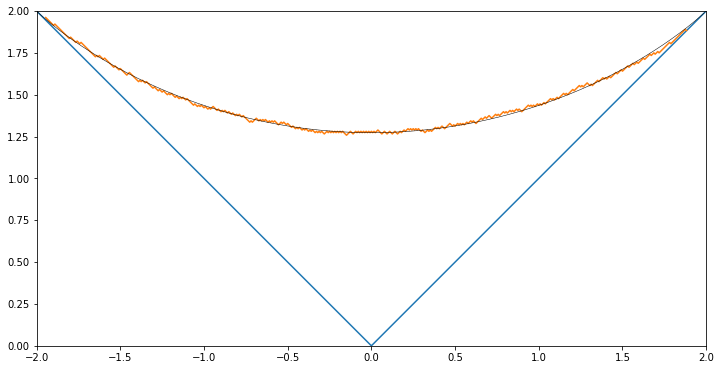

In [241]:
# create a figure and axes
fig = plt.figure(figsize=(12,12))
ax1 = plt.subplot(1,1,1)   
ax1.set_aspect('equal','box')
ax1.set_ylim([0,2])
ax1.set_xlim([-2,2])
c=2
plt.plot([-2,0,2,0,-2],[2,0,2,4,2])

n=np.sqrt(16384)
plt.plot([(x-i-dx)/n for (i,x) in enumerate(rows) for dx in (0,1)],
         [(x+i+dx)/n for (i,x) in enumerate(rows) for dx in (0,1)])
xs=np.arange(-2,2,1/100)
ys=2/np.pi*(xs*np.arcsin(xs/2)+np.sqrt(4-xs*xs))
with matplotlib.rc_context({'lines.linewidth': 0.5, 'lines.linestyle': '-'}):
    plt.plot(xs,ys,color='k')
plt.show()

This is famous Vershik-Kerov-Logan-Shepp curve
$$\Omega(u)=\frac{2}{\pi}\left(u \arcsin\left(\frac{u}{2}\right)+\sqrt{4-u^2}\right).$$
In this course we will learn how to study this limiting behavior. We will connect illustrative examples of random Young diagrams to various advanced mathematical topics, such as representation theory, random matrices, orthogonal polynomials and integrable systems. 

### Connection to random matrices

Let us look at the distribution of the length of the first row of our random Young diagram. For that we sample 2000 diagrams of 1024 boxes and plot a histogram of first row lengths. It will take about a minute. 

CPU times: user 1min 17s, sys: 0 ns, total: 1min 17s
Wall time: 1min 17s


(array([  4.,  20., 164., 457., 609., 421., 232.,  78.,  11.,   4.]),
 array([50. , 51.9, 53.8, 55.7, 57.6, 59.5, 61.4, 63.3, 65.2, 67.1, 69. ]),
 <BarContainer object of 10 artists>)

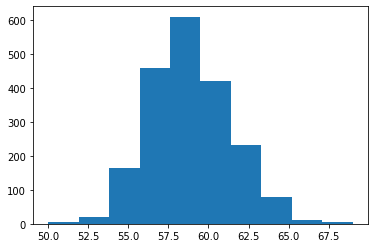

In [216]:
%%time
n=1024
lmbs=[]
for _ in range(2000):
    d=sample_diagram(n)
    lmbs.append(d[0])
plt.hist(lmbs)

We see that average length of the first row $\lambda_1\approx 2\sqrt{n}$, let us shift the histogram and scale by the factor $n^{-\frac{1}{6}}$.

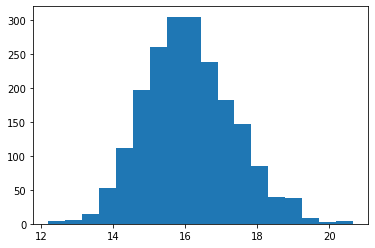

In [243]:
younghist=plt.hist((np.array(lmbs)-2*np.sqrt(n))/n**(1/6),bins=18)

Now compare this to the distribution of the largest eigenvalue of a random complex hermitean gaussian matrix. We sample a complex $1024\times 1024$ matrix with real and imaginary parts of matrix elements from Gaussian standard distribution $\mathcal{N}(0,1)$ and take half a sum of this matrix and its conjugate. 

In [250]:
n=1024
Z=np.array(np.random.randn(n,n))+1j*np.array(np.random.randn(n,n))
X=(Z+Z.T.conjugate())/2

In [251]:
X

array([[ 1.31377104+0.j        ,  1.00330035-0.35468022j,
        -1.08993206-0.40811038j, ..., -1.02300177+0.38829202j,
        -0.71863483-0.13752783j,  0.35660296+0.80332349j],
       [ 1.00330035+0.35468022j,  0.00796446+0.j        ,
        -0.69055477+0.43803517j, ..., -0.52803966+0.17654911j,
         1.42465978-0.60505291j, -0.68372693+0.4189899j ],
       [-1.08993206+0.40811038j, -0.69055477-0.43803517j,
         2.54764135+0.j        , ..., -0.06681776-0.02821892j,
        -0.23547492+0.53447582j, -0.40618104-0.02417738j],
       ...,
       [-1.02300177-0.38829202j, -0.52803966-0.17654911j,
        -0.06681776+0.02821892j, ...,  0.66973378+0.j        ,
        -0.52801989+0.04682213j, -0.33996663+0.42009685j],
       [-0.71863483+0.13752783j,  1.42465978+0.60505291j,
        -0.23547492-0.53447582j, ..., -0.52801989-0.04682213j,
        -1.40114551+0.j        ,  0.25130934-0.21425445j],
       [ 0.35660296-0.80332349j, -0.68372693-0.4189899j ,
        -0.40618104+0.02417738

Eigenvalues of this matrix satisfy famous **Wigner semicircle law**, that is the scaled density of eigenvalues tends to a semicircle as size of random matrix grows. 

CPU times: user 21.9 s, sys: 13.3 s, total: 35.2 s
Wall time: 6.1 s


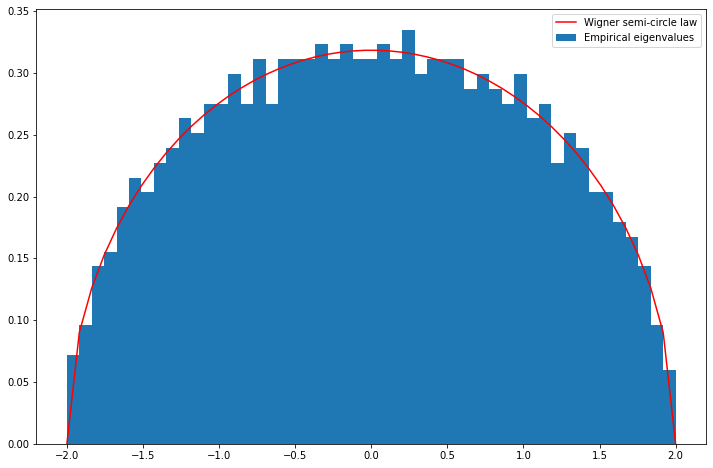

In [252]:
%%time
edges=np.linspace(-2,2,50)

# Limiting measure
mu = np.sqrt( np.maximum.reduce( [4 - edges**2, np.zeros(len(edges))] ) )/2/np.pi

# Empirical histogram
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(1,1,1)   

ax1.hist(np.linalg.eigh(X/np.sqrt(n))[0],bins=edges,weights=1/n/(edges[1]-edges[0])*np.ones(n),label='Empirical eigenvalues')
ax1.plot(edges,mu,'r',label='Wigner semi-circle law')
_=plt.legend()

Now let us sample 2000 of such matrices and look at the histogram of the largest eigenvalue. This takes a long time, more than hour one my laptop.

In [169]:
%%time
import scipy
eigs=[]
for _ in range(2000):
    Z=np.array(np.random.randn(n,n))+1j*np.array(np.random.randn(n,n))
    X=(Z+Z.T.conjugate())/2
    eigs.append(scipy.sparse.linalg.eigsh(X,1,which='LA')[0][0])

CPU times: user 1h 22min 6s, sys: 59min 25s, total: 2h 21min 31s
Wall time: 20min 59s


The largest eigenvalue $\lambda_1\approx 2\sqrt{n}$, and we again shift it and now scale by the factor $n^{\frac{1}{6}}$. 

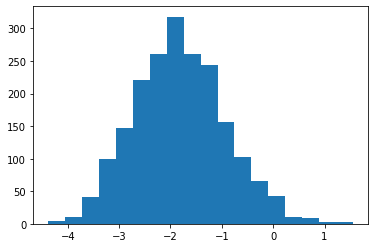

In [222]:
guehist=plt.hist((np.array(eigs)-2*np.sqrt(n))*n**(1/6),bins=18)

Let us compare both distributions on the same picture and plot Tracy-Widom distribution on the same plot.

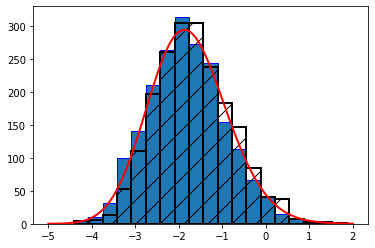

In [253]:
from TracyWidom import TracyWidom
tw2 = TracyWidom(beta=2)
xs=np.linspace(-5,2,100)

tw_sample1=(np.array(lmbs)-2*np.sqrt(n))/n**(1/6)
tw_sample2=(np.array(eigs)-2*np.sqrt(n))*n**(1/6)
binwidth=0.33
bins=np.arange(min(tw_sample1), max(tw_sample1) + binwidth, binwidth)
plt.plot(xs,tw2.pdf(xs)*2000*binwidth,color='r',linewidth=2)
plt.hist(tw_sample2,bins=bins,edgecolor='b')
plt.hist(tw_sample1,bins=bins,hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=False)

plt.show()

In [249]:
n

128.0

We can see the relation of the fluctuations of the first row length for the random Young diagrams and the fluctuations of the largest eigenvalue of the **Gaussian Unitary Ensemble** **(GUE)**. 
This is an example of *universality*. 

In these lectures I hope to cover limit shape derivation and study fluctuations for certain models that come from representation theory of symmetric group and simple Lie groups.

### Course plan 

1. Infinite wedge representation
2. Free fermions and bosonization
3. Vertex operators
4. Partitions and Schur polynomials 
5. Boson-fermion correspondence
6. Plancherel measure on partitions
7. Correlation kernel from free fermions and limit shape for Plancherel measure
8. Relation of Plancherel measure to RSK algorithm
9. RSK and Schur-Weyl duality between $\mathrm{GL}(n)$ and $\mathrm{S}_k$
9. Representations of $\mathrm{GL}(n)$, exterior powers and exterior algebra
10. Skew Howe $\mathrm{GL}(n)-\mathrm{GL}(k)$ duality
11. Probability measure on Young diagrams in the box and dual RSK algorithm
11. Connection to lozenge tilings and to five-vertex model
12. Limit shape for skew $\mathrm{GL}(n)-\mathrm{GL}(k)$ duality from free fermions
13. Skew Howe dualities for other classical series of Lie groups
14. Young diagrams and tableaux for symplectic groups
15. Proctor algorithm for skew Howe duality of symplectic groups $\mathrm{Sp}_{2n}$ and $\mathrm{Sp}_{2k}$
16. Limit shapes for symplectic groups and scalar Riemann-Hilbert problem
17. Local asymptotics of correlation kernel for skew $\mathrm{GL}(n)-\mathrm{GL}(k)$ duality, Airy kernel, local fluctuations around limit shape
18. Global fluctuations around limit shape, Krawtchouk and q-Krawtchouk orthogonal polynomials, Central limit theorem
19. Asymptotics of orthogonal polynomials, Riemann-Hilbert problem and its integrability


### Literature
1. Kac V.G. - Infinite dimensional Lie algebras-CUP (1995)
2. Kac, Raina, Rozhkovskaya "Bombay Lectures on Highest-Weight Representations of Infinite Dimensional Lie Algebras"
2. Okounkov, Andrei. "Infinite wedge and random partitions." Selecta Mathematica 7.1 (2001): 57. [arXiv version](https://arxiv.org/abs/math/9907127)
3. Okounkov, Andrei. "Symmetric functions and random partitions." Symmetric functions 2001: surveys of developments and perspectives. Springer Netherlands, 2002. [arXiv version](https://arxiv.org/abs/math/0309074)
4. Borodin, Alexei, and Vadim Gorin. "Lectures on integrable probability." Probability and statistical physics in St. Petersburg 91 (2016): 155-214. [arXiv version](https://arxiv.org/abs/1212.3351)
4. Textbooks on RSK and Schur-Weyl and Howe dualities 
5. Proctor, Robert A. "Reflection and algorithm proofs of some more Lie group dual pair identities." Journal of Combinatorial Theory, Series A 62.1 (1993): 107-127.
6. Nazarov, A., P. Nikitin, and D. Sarafannikov. "Skew Howe duality and q-Krawtchouk polynomial ensemble." Representation theory, dynamical systems, combinatorial methods. Part XXXIV, Zap. Nauchn. Sem. POMI 517: 106-124. [arXiv version](https://arxiv.org/abs/2208.10331)
7. Betea, Dan, Anton Nazarov, and Travis Scrimshaw. "Limit shapes for skew Howe duality." arXiv preprint [arXiv:2211.13728](https://arxiv.org/abs/2211.13728) (2022). 
8. Dan Romik. "The surprising mathematics of longest increasing subsequences", volume 4 of Institute of Mathematical Statistics Textbooks. Cambridge University Press, New York, 2015. [Free download](https://www.math.ucdavis.edu/~romik/surprising-mathematics-of-longest-increasing-subsequences/)